# The 90's chart

This notebook is dedicated to the 90's decade chart.

In [1]:
import pandas as pd
import re
import numpy as np
import operator
from similarity.levenshtein import Levenshtein
levenshtein = Levenshtein()

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistic test
import scipy.stats as st

## Original Chart

The 90's have had a decade chart conducted in 1999, and it cosisted 100 songs as well. Let's have a look at it right now.

In [35]:
nineties_original_df = pd.read_csv("DFs/original_nineties_decade_chart.csv")

In [36]:
print(nineties_original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
location                    100 non-null int64
name                        100 non-null object
artist                      100 non-null object
spotify_popularity          100 non-null int64
spotify_valence             100 non-null float64
spotify_tempo               100 non-null float64
spotify_instrumentalness    100 non-null float64
spotify_year                100 non-null int64
wikipedia_year              100 non-null int64
genres                      100 non-null object
views                       100 non-null int64
yearly_position             100 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 8.3+ KB
None


In [37]:
years = []
years_source = []
for row in nineties_original_df.iterrows():
    if int(row[1]['wikipedia_year']) > 1989 and int(row[1]['wikipedia_year']) < 2000:
        years.append(row[1]['wikipedia_year'])
        years_source.append('Wikipedia')
    elif int(row[1]['spotify_year']) > 1989 and int(row[1]['spotify_year']) < 2000:
        years.append(row[1]['spotify_year'])
        years_source.append('Spotify')
    else:
        years.append(int(input(row[1]['name'])))
        years_source.append('Manual')
nineties_original_df['year'] = years
nineties_original_df['year_source'] = years_source

Candle in the Wind1997
Don't Let the Sun Go Down on Me1991
Another Day in Paradise1990
Ray of Light1998
Somebody to Love1992
As1999


The original chart actually had two songs that were not officially released in the 90's. "Candle in the Wind" by Elton John was released in 1973 in memory to Marilyn Monroe, who has died 11 years earlier. It had then been re-issued as a tribute princess Diana after her tragic death. This version of the song has been recorded in Guiness World Book of Records as the second highest-selling single of all time, only bypassed by Bing Corsby's White Christmas from 1942.

The second song re-issued in the 90's is Somebody to Love by Queen. It was debuted in 1976 and was received positively in the charts. It was then re-issued after the death of Queen's leading singer, Freddie Mercury in 1991. The song was played live in 1992 during the Freddie Mercury Tribure Concert, with George Michael as the leading vocals.

In [38]:
yearly_charts = pd.read_csv("DFs/Nineties.csv")
top_yearly = yearly_charts.loc[yearly_charts["Location"] == 1]
top_yearly = top_yearly.drop(columns = '1990')
levenshtein = Levenshtein()
original_locations = []
for yearly_song in top_yearly.iterrows():
    found_song = 0
    for original_song in nineties_original_df.iterrows():
        if levenshtein.distance(yearly_song[1]['Song'], original_song[1]['name']) <= 1:
            original_locations.append(original_song[1]['location'])
            found_song = 1
    if found_song == 0:
        original_locations.append(0)
top_yearly['original_decade_location'] = original_locations
display(top_yearly)

,Year,Location,Artist,Song,original_decade_location
0,1990,1,Sinead Oconnor,Nothing Compares 2 U,4
42,1991,1,Bryan Adams,Everything I Do (I Do It For You),0
77,1992,1,East 17,House of Love,0
127,1993,1,Pet Shop Boys,Go West,54
177,1994,1,Bon Jovi,Always,19
227,1995,1,Coolio,Gangsta's Paradise,59
277,1996,1,Spice Girls,Wannabe,0
317,1997,1,Aqua,Barbie Girl,74
339,1999,1,Britney Spears,Baby One More Time,0


Looking at the yearly charts data, I should mention that I am missing data on 1998 chart. With that being said, there are at least five songs that have topped their yearly chart, and didn't make it into the decade chart at all. Let's have a look at the genre breakdown:

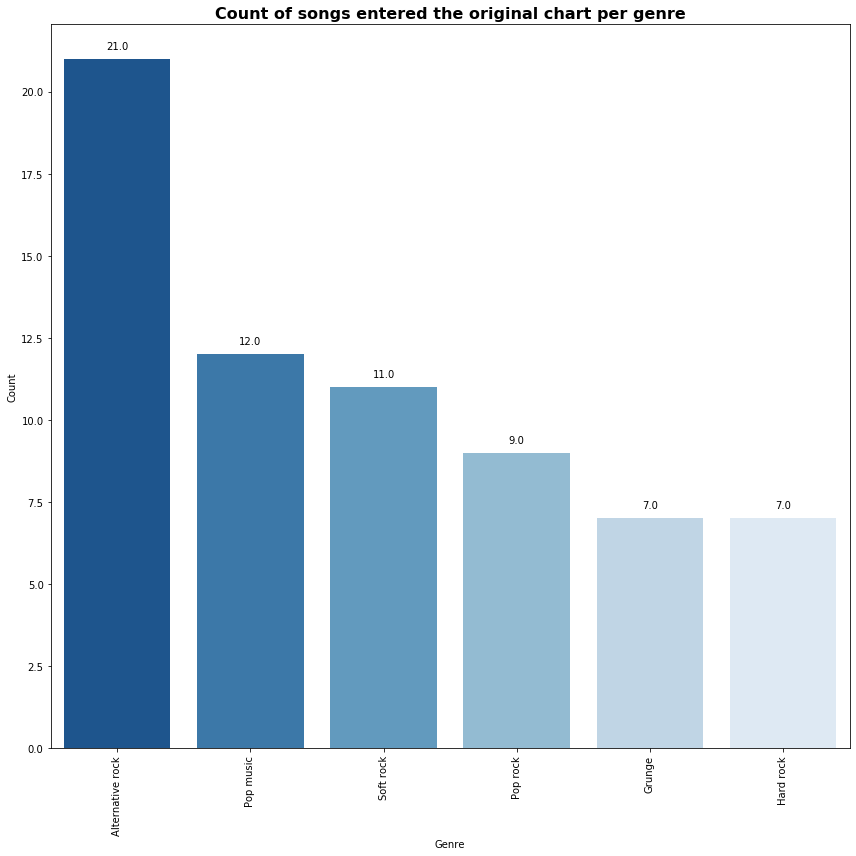

In [39]:
genres_dict = {}
for song_genre in nineties_original_df['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the original chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [42]:
print(genres_dict['Dance-pop'])

3


We can see that the chart is genrerally dominated by Alternative Rock, with high presence to pop music and all the songs across this spectrum as well. Now let's see the yearly breakdown:

In [7]:
grouped_by_year = nineties_original_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_songs'] = group[1]['name'].count()
    year['avg_song_pop'] = group[1]['spotify_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1]['location'].mean()
    year['yearly_entrances_percentage'] = group[1].loc[group[1]['yearly_position'] > 0]['yearly_position'].count() / group[1]['name'].count() 
    year['average_yearly_position'] = group[1].loc[group[1]['yearly_position'] > 0]['yearly_position'].mean()
    year['avg_valence'] = group[1]['spotify_valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_songs,avg_song_pop,avg_views,avg_chart_location,yearly_entrances_percentage,average_yearly_position,avg_valence,popular_genre
0,1990,7,71.000000,92556.857143,41.285714,0.857143,6.000000,0.557857,Pop music
1,1991,14,74.142857,121621.285714,36.500000,0.571429,8.375000,0.463929,Alternative rock
2,1992,16,75.750000,127139.125000,41.000000,0.750000,17.500000,0.407813,Grunge
3,1993,10,68.400000,54781.000000,55.500000,0.700000,18.428571,0.395700,Alternative rock
4,1994,10,75.500000,134042.000000,56.100000,0.600000,10.500000,0.383300,Alternative rock
5,1995,10,65.100000,139767.900000,66.400000,0.700000,7.142857,0.331320,Alternative rock
6,1996,8,66.125000,114287.000000,54.750000,0.625000,7.400000,0.387625,Alternative rock
7,1997,10,73.600000,143656.800000,51.600000,0.400000,6.000000,0.542620,Pop music
8,1998,12,70.833333,84823.333333,56.166667,0.083333,6.000000,0.447250,Electronica
9,1999,3,72.333333,37981.666667,62.000000,0.333333,11.000000,0.584667,Latin pop


First of all, we can see from the yearly breakdown that twelve songs came from the missing 1998, which could explain some of the 40 songs that entered the chart without appearing in any of the yearly charts. The most popular year is obviuosly 1992, which saw one of the most important musical movements of the 90's - the Grunge movement at it's prime. The least popular year by far is 1999, whose timely proximity to the chart seemed to hurt the song's chances of entering. It is surprising to see that only a third of the songs entered the chart from 1999 appeared in it's yearly chart.

The popular genres and average valence sections seems correlated. As the most popular genre moves away from Pop to Alternative Rock, we see a drop in the average valence as well.

## Renewed Chart

In [3]:
nineties_df = pd.read_csv("DFs/united_nineties.csv")
print(nineties_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 23 columns):
name                   493 non-null object
version_exists         493 non-null int64
artist                 493 non-null object
artist_first_letter    493 non-null object
year                   493 non-null int64
year_source            493 non-null object
song_popularity        493 non-null int64
artist_popularity      493 non-null int64
duration_ms            493 non-null int64
key                    493 non-null int64
time_signature         493 non-null int64
acousticness           493 non-null float64
danceability           493 non-null float64
energy                 493 non-null float64
instrumentalness       493 non-null float64
loudness               493 non-null float64
speechiness            493 non-null float64
valence                493 non-null float64
tempo                  493 non-null float64
genres                 493 non-null object
views                  493 non-nul

In [9]:
renewed_top_100 = nineties_df.loc[nineties_df['new_chart_location'] < 101]
chart_comparison_table = {}
chart_comparison_table['Chart_name'] = ['Original Chart', 'Renewed Chart']
chart_comparison_table['Count_songs'] = [nineties_original_df['name'].count(), renewed_top_100['name'].count()]
chart_comparison_table['Average Spotify Popularity'] = [nineties_original_df['spotify_popularity'].mean(), renewed_top_100['song_popularity'].mean()]
chart_comparison_table['Average Valence'] = [nineties_original_df['spotify_valence'].mean(), renewed_top_100['valence'].mean()]
chart_comparison_table['Average Tempo'] = [nineties_original_df['spotify_tempo'].mean(), renewed_top_100['tempo'].mean()]
chart_comparison_table['Average Instrumentalness'] = [nineties_original_df['spotify_instrumentalness'].mean(), renewed_top_100['instrumentalness'].mean()]
chart_comparison_table['Average Views'] = [nineties_original_df['views'].mean(), renewed_top_100['views'].mean()]
chart_comparison_table['Average Year'] = [nineties_original_df['year'].mean(), renewed_top_100['year'].mean()]
chart_comparison_table = pd.DataFrame(chart_comparison_table)
display(chart_comparison_table)

,Chart_name,Count_songs,Average Spotify Popularity,Average Valence,Average Tempo,Average Instrumentalness,Average Views,Average Year
0,Original Chart,100,71.69,0.436764,115.27990,0.019437,111534.20,1994.07
1,Renewed Chart,100,68.29,0.495330,114.88242,0.007986,112718.24,1994.55


Comparing both charts reveals the small differences between the two. The songs on the renewed chart are slightly less popular in Spotify, but have a bit more views. That could indicate that these songs are viewed as a piece of musical history rather than an actual song who people like to listen to. Another small diffrences lay in the spotify musical features. The original song contains overall slightly darker songs with higher instrumental component.

## Original Position

In [11]:
original_decade_position = []
for new_song in nineties_df.iterrows():
    found_song = 0
    for old_song in nineties_original_df.iterrows():
        if levenshtein.distance(new_song[1]['name'].split("_")[1], old_song[1]['name']) <=1 and found_song == 0:
            original_decade_position.append(old_song[1]["location"])
            found_song = 1
    if found_song == 0:
        original_decade_position.append(0)
nineties_df['original_decade_position'] = original_decade_position

In [12]:
for old_song in nineties_original_df.iterrows():
    found_song = 0
    for new_song in nineties_df.iterrows():
        if levenshtein.distance(new_song[1]['name'].split("_")[1], old_song[1]['name']) <=1 and found_song == 0:
            found_song = 1
    if found_song == 0:
        for new_song in nineties_df.iterrows():
            if levenshtein.distance(new_song[1]['name'].split("_")[1], old_song[1]['name']) <=5 and found_song == 0:
                print("Old Song = " +old_song[1]['name'])
                print("New Song = " +new_song[1]['name'].split("_")[1])
                user_confirm = input("Confirm?")
                if user_confirm == 'y' or user_confirm == "Y":
                    nineties_df.loc[nineties_df['name'] == new_song[1]['name'], ['original_decade_position']] = old_song[1]["location"]
                    found_song = 1
    if found_song == 0:
        print("Old Song = " +old_song[1]['name'])

Old Song = Don't Cry
New Song = Don't Speak
Confirm?n
Old Song = Don't Cry
New Song = Doin' It
Confirm?n
Old Song = Don't Cry
Old Song = ‎(Everything I Do) I Do It for You
New Song = (Everything I Do) I Do It For You
Confirm?y
Old Song = Wind of Change 
New Song = Wind Of Change
Confirm?y
Old Song = Candle in the Wind
Old Song = Killing Me Softly
Old Song = To the Moon and Back
New Song = To the Moon & Back
Confirm?y
Old Song = All I Need
Old Song = Don't Let the Sun Go Down on Me
Old Song = Time to Say Goodbye
Old Song = Perfect Day
Old Song = ‎7 Seconds
Old Song = I'll Be Missing You
Old Song = Angel in My Heart
Old Song = Un-Break My Heart
New Song = Unbreak My Heart
Confirm?y
Old Song = Somebody to Love
Old Song = The Man Who Sold the World
Old Song = You'll See


In [14]:
from pathlib import Path
p = Path('C:/Users/tomha/PycharmProjects/GlglzPredictor/DFs/')
nineties_df.to_csv(Path(p, 'nineties_updated.csv'), index=None, header=True)

In [15]:
nineties_df = nineties_original_df = pd.read_csv("DFs/nineties_updated.csv")
op_df = nineties_df.loc[nineties_df['original_decade_position'] == 0].loc[nineties_df['new_chart_location'] < 101]
print(op_df['name'].count())

35


In [16]:
genres_dict = {}
for song_genre in op_df['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
display(op_df.sort_values(by=['new_chart_location']).head(1))
display(newDict)

,name,version_exists,artist,artist_first_letter,year,year_source,song_popularity,artist_popularity,duration_ms,key,...,instrumentalness,loudness,speechiness,valence,tempo,genres,views,old_chart_position,new_chart_location,original_decade_position
4,nineties_I Want It That Way,0,Backstreet Boys,B,1999,wikipedia,78,80,213600,6,...,0.0,-5.642,0.0261,0.484,99.031,['Pop'],155900,0,5,0


{'Pop': 6, 'Alternative rock': 7}

In [17]:
no_op = nineties_df.loc[nineties_df['new_chart_location'] < 101][~nineties_df.isin(op_df)].dropna()
genres_dict = {}
for song_genre in no_op['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
display(newDict)

{'Hard rock': 6, 'Pop': 6, 'Grunge': 7, 'Alternative rock': 20, 'Soft rock': 6}

thirty-nine songs off the new chart didn't appear in the original decade chart. The most successfull is "I want it that way" by the Backstreet Boys. Seven of these songs are marked as "Alternative Rock", while six are Pop songs.
Out of the 61 songs that have made it into both charts, 20 are defined as 'Alternative Rock', and seven are 'Grunge'.

## Version Exists

In [18]:
version_exists = nineties_df.groupby('version_exists')
exists_df = []
for group in version_exists:
    category = {}
    category['name'] = group[0]
    category['count_songs'] = group[1]['name'].count()
    category['avg_popularity'] = group[1]['song_popularity'].mean()
    category['avg_artist_popularty'] = group[1]['artist_popularity'].mean()
    category['count_wikipedia'] = group[1].loc[group[1]['views'] > 0]['views'].count()
    category['wikipedia_percentage'] = group[1].loc[group[1]['views'] > 0]['views'].count() /  group[1]['name'].count()
    category['avg_views'] = group[1].loc[group[1]['views'] > 0]['views'].mean()
    category['count_old_chart'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count()
    category['old_chart_percentage'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count() / group[1]['name'].count()
    category['avg_new_chart'] = group[1]['new_chart_location'].mean()
    category['count_new_chart'] = group[1].loc[group[1]['new_chart_location'] < 101]['new_chart_location'].count()
    category['new_chart_percentage'] = group[1].loc[group[1]['new_chart_location'] < 101]['new_chart_location'].count() / group[1]['name'].count()
    exists_df.append(category)
exists_df = pd.DataFrame(exists_df)
display(exists_df)

,name,count_songs,avg_popularity,avg_artist_popularty,count_wikipedia,wikipedia_percentage,avg_views,count_old_chart,old_chart_percentage,avg_new_chart,count_new_chart,new_chart_percentage
0,0,397,57.690176,65.914358,380,0.957179,52800.952632,105,0.264484,245.138539,83,0.209068
1,1,96,52.531250,65.083333,93,0.968750,55202.924731,34,0.354167,254.697917,17,0.177083


96 Songs off the nominee list have had a version reference. Surprisingly, their average popularity is lower than the rest of the songs, and their entrance percentage to the new chart is a bit lower as well. On the other hand, the entrance percentage of the "There is a version" group is much higher than the "No version" group.

## Artist

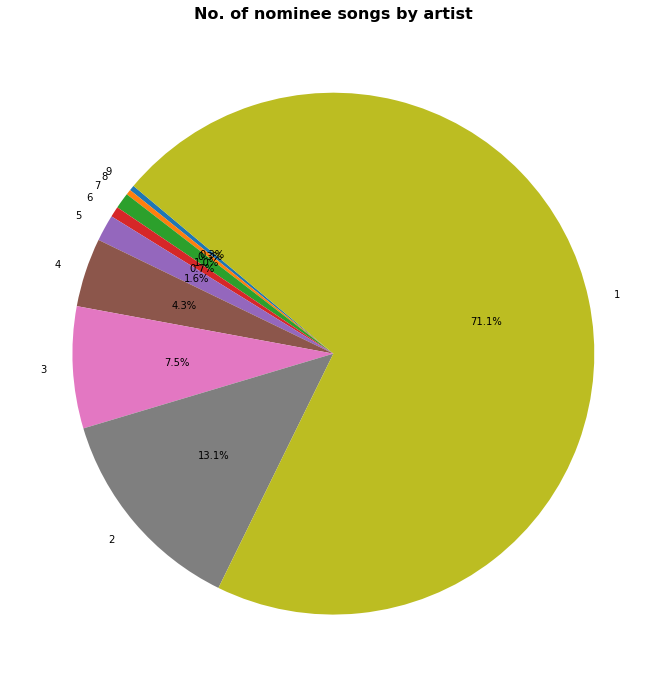

In [19]:
artist_value_counts = nineties_df.artist.value_counts()
artist_count = pd.DataFrame(columns = ['key', 'count'], dtype=int)
for orig_value in artist_value_counts:
    if orig_value in pd.Series(artist_count['count'].astype('int')):
        artist_count.loc[artist_count['key'] == orig_value, 'count'] = artist_count.at[orig_value, 'count']+1
    else:
        artist_count.loc[orig_value] = [orig_value, 1]
plt.figure(figsize=(12,12))
plt.pie(artist_count['count'], labels=artist_count['key'],
autopct='%1.1f%%', startangle=140)
plt.title("No. of nominee songs by artist", {'fontsize': 16,
 'fontweight' : 'bold',
 'verticalalignment': 'bottom', 'horizontalalignment': 'center'})
plt.show()

In [20]:
popular_artists_df = []
for index in nineties_df.artist.value_counts()[nineties_df.artist.value_counts() > 6].index:
    artist = {}
    artist['name'] = index
    artist['nominee_songs'] = nineties_df.artist.value_counts()[index]
    artist['entered_songs'] = nineties_df.loc[nineties_df['new_chart_location'] < 101].artist.value_counts()[index]
    artist['success_rate'] = artist['entered_songs'] / artist['nominee_songs']
    popular_artists_df.append(artist)
popular_artists_df = pd.DataFrame(popular_artists_df)
display(popular_artists_df)

,name,nominee_songs,entered_songs,success_rate
0,Madonna,9,1,0.111111
1,Radiohead,8,2,0.250000
2,Nirvana,7,3,0.428571
3,R.E.M.,7,2,0.285714
4,Michael Jackson,7,3,0.428571


Unlike the previous charts, the 90's chart shows a high degree of diversity when it comes to performing artists. The artist that appeared the most in the nomination list is once again Madonna with 9 nominees. She have had a poor success rate of only one song entering the chart. The second place is occupied by Israel's favorite Radiohead, with eight nominees, two of which made it to the top 100.

In [22]:
original_artists = nineties_original_df.groupby('artist')
original_artists_df = []
for group in original_artists:
    artist = {}
    artist['name'] = group[0]
    artist['count_songs'] = group[1]['name'].count()
    artist['avg_position'] = group[1]['location'].mean()
    artist['avg_popularity'] = group[1]['spotify_popularity'].mean()
    artist['sum_views'] = group[1]['views'].sum()
    original_artists_df.append(artist)
original_artists_df = pd.DataFrame(original_artists_df)
display(original_artists_df.loc[original_artists_df['count_songs'] > 2])

KeyError: 'location'

Looking at the original chart, Madonna have had much greater success being the top artist with five entries in the Top 100. The rest of the list is made of mostly Grunge/Rock artists such as Aerosmith, Guns N' Roses, Nirvana or Pearl Jam.

In [6]:
grouped_by_artist = nineties_df.groupby('artist')
artists_df = []
for index in nineties_df.artist.value_counts().index:
    artist = {}
    artist['name'] = index
    artist['candidate_songs'] = nineties_df.artist.value_counts()[index]
    artist_group = grouped_by_artist.get_group(index)
    artist['first_letter'] = artist_group['artist_first_letter'].values[0]
    artist['popularity'] = artist_group['artist_popularity'].values[0]
    artist['avg_song_pop'] = artist_group['song_popularity'].mean()
    artist['max_song_pop'] = artist_group['song_popularity'].max()
    artist['min_song_pop'] = artist_group['song_popularity'].min()
    artist['genres'] = {}
    for song in artist_group['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in artist['genres'].keys():
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] += 1
    artist['sum_views'] = artist_group['views'].sum()
    artist['avg_views'] = artist_group['views'].mean()
    artist['avg_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.mean()
    artist['count_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.count()
    artist['avg_new_chart'] = artist_group.new_chart_location.mean()
    artist['count_new_chart'] = artist_group.where(artist_group.new_chart_location <= 100).name.count()
    artists_df.append(artist)
artists_df = pd.DataFrame(artists_df)
print(artists_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 14 columns):
name               305 non-null object
candidate_songs    305 non-null int64
first_letter       305 non-null object
popularity         305 non-null int64
avg_song_pop       305 non-null float64
max_song_pop       305 non-null int64
min_song_pop       305 non-null int64
genres             305 non-null object
sum_views          305 non-null int64
avg_views          305 non-null float64
avg_old_chart      101 non-null float64
count_old_chart    305 non-null int64
avg_new_chart      305 non-null float64
count_new_chart    305 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 29.8+ KB
None


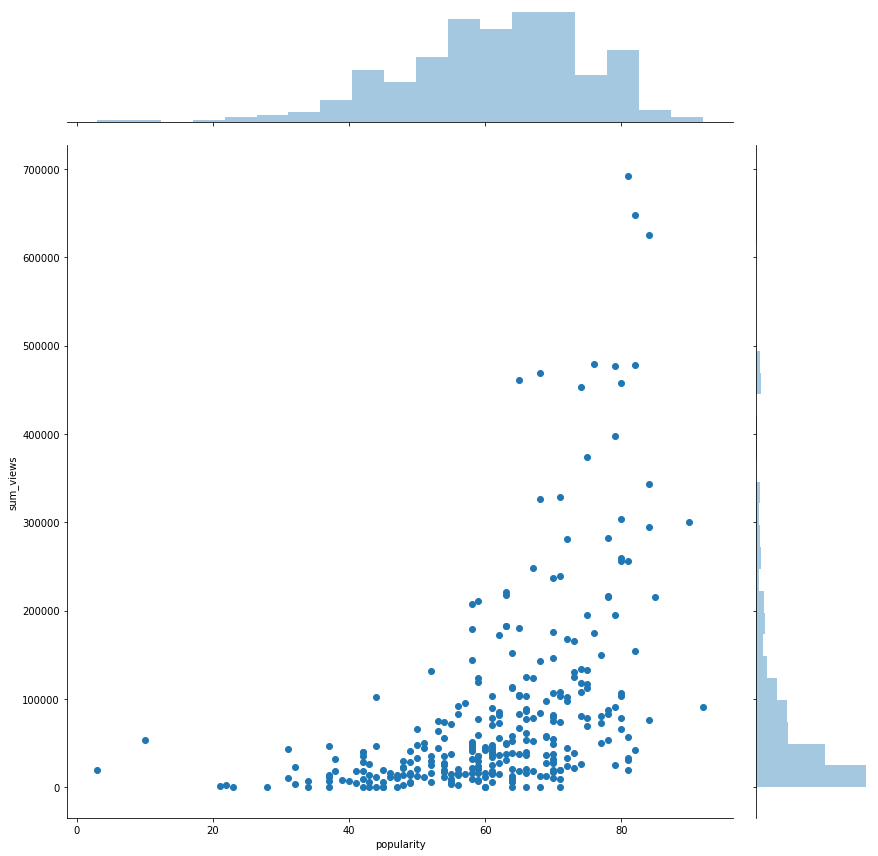

In [7]:
sns.jointplot(x="popularity", y="sum_views", data=artists_df, height=12)

In [8]:
display(artists_df.loc[artists_df['sum_views'] > 500000])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
2,Michael Jackson,7,M,84,66.428571,71,61,"{'Contemporary R&B': 3, 'Pop rock': 2, 'New ja...",624592,89227.428571,15.8,5,166.714286,3
3,Nirvana,7,N,81,71.000000,76,66,"{'Grunge': 4, 'Alternative rock': 4, 'Hard roc...",691878,98839.714286,31.5,2,127.428571,3
8,Whitney Houston,5,W,82,67.000000,77,58,"{'Country': 1, 'Gospel': 1, 'Soul': 1, 'Contem...",648043,129608.600000,24.0,2,227.400000,1


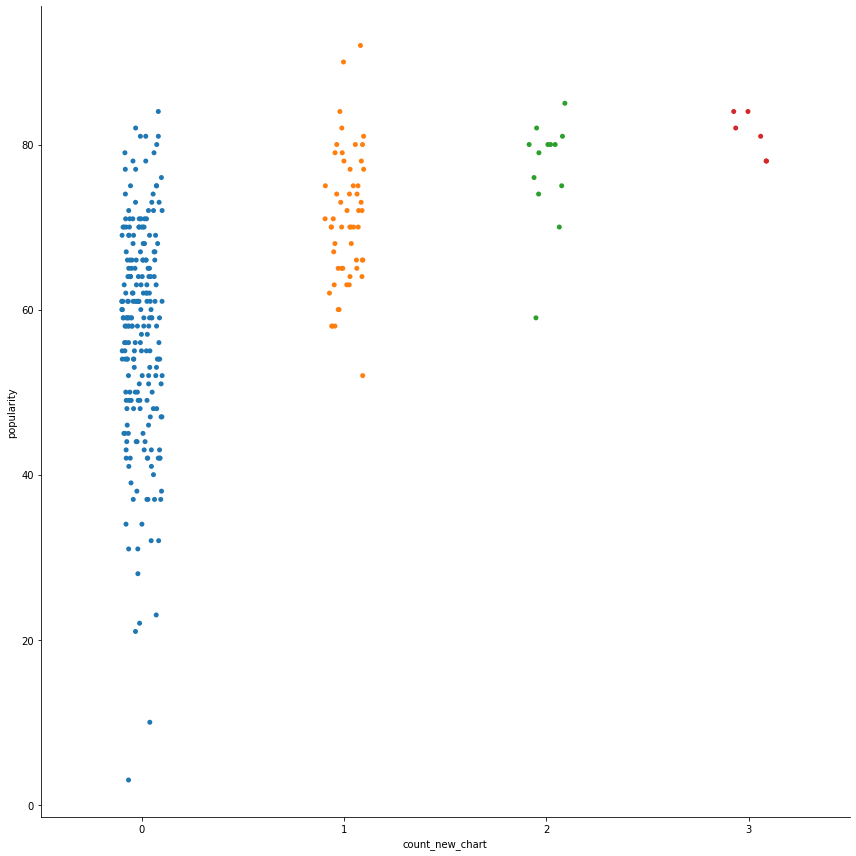

In [9]:
sns.catplot(x="count_new_chart", y="popularity", data=artists_df, height=12)

In [10]:
display(artists_df.loc[artists_df['count_new_chart'] > 0].sort_values(by=['popularity']).head(1))
display(artists_df.loc[artists_df['popularity'] < 52].count()[0])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
112,The Connells,1,T,52,66.0,66,66,{},34892,34892.0,7.0,1,67.0,1


66

There is a certain thershold regarding the artist popularity among those who got songs into the chart. While the lowest popularity rate of artist that got into the chart is 52, there are 66 artists of the candidate songs with lower popularity rates, none of which have entered the chart.

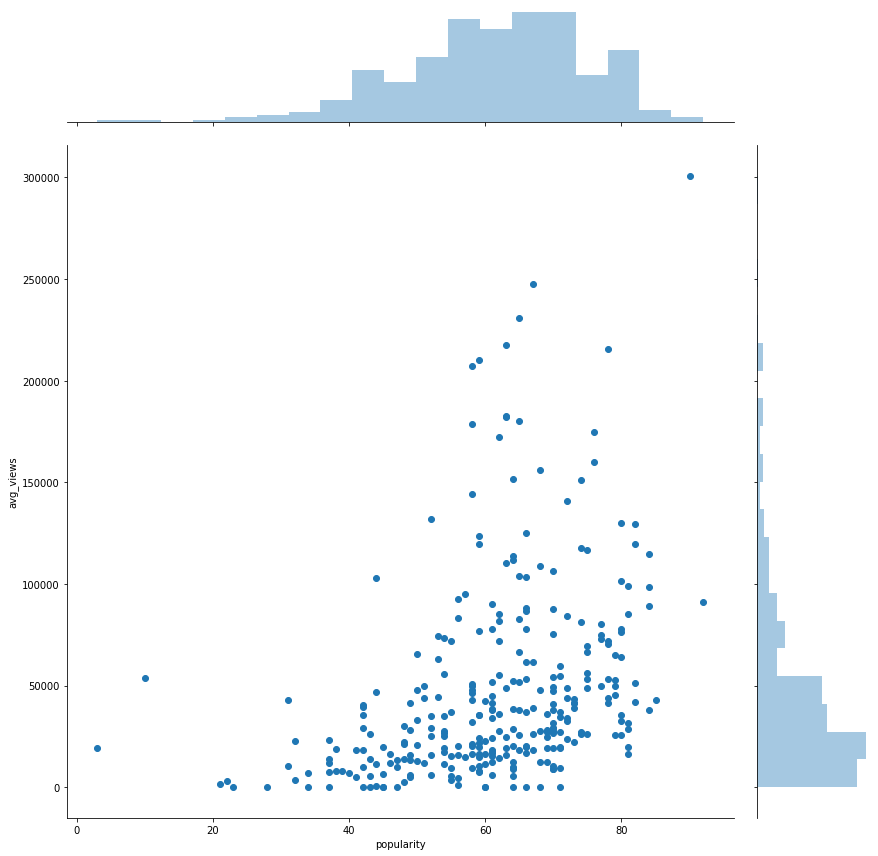

In [11]:
sns.jointplot(x="popularity", y="avg_views", data=artists_df, height=12)

In [12]:
display(artists_df.sort_values(by=['avg_views'], ascending = False).head(1))

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
186,Queen,1,Q,90,60.0,60,60,{'Hard rock': 1},300694,300694.0,14.0,1,20.0,1


Once again, Queen's only song in this chart has brought Queen to the top of the Average Wikipedia Views category.

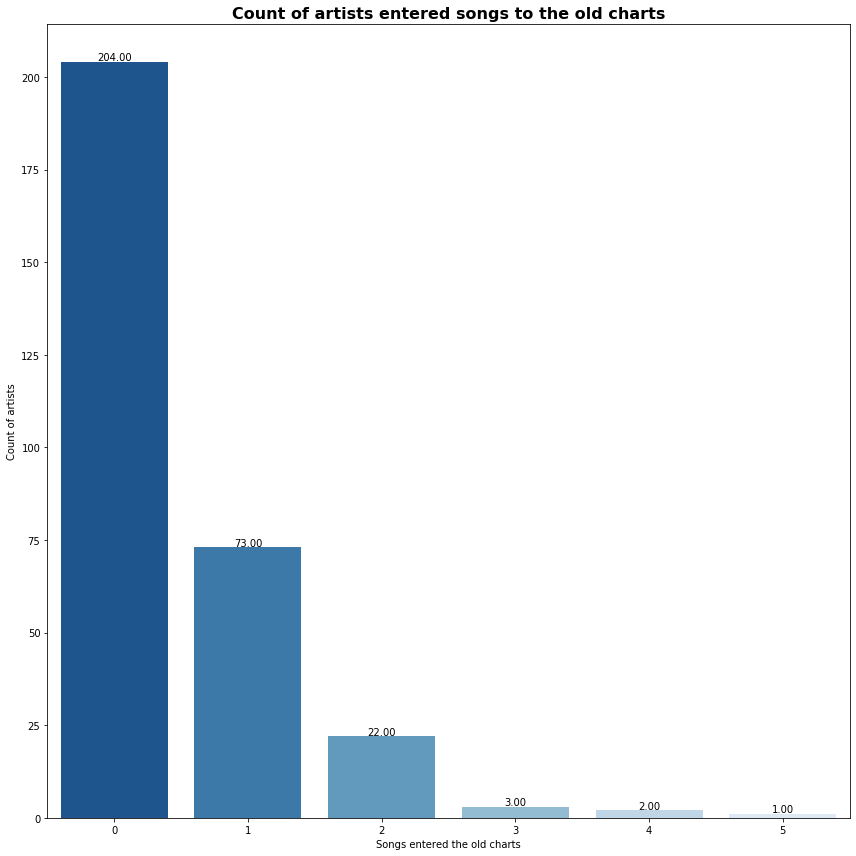

In [13]:
plt.figure(figsize=(12,12))
#sns.countplot()
ax = sns.countplot(x="count_old_chart", data=artists_df, palette ="Blues_r")
ax.set_title("Count of artists entered songs to the old charts", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel='Songs entered the old charts', ylabel='Count of artists')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.4,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [14]:
display(artists_df.loc[artists_df['count_old_chart'] >= 4])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
0,Madonna,9,M,79,53.111111,66,44,"{'House': 1, 'Electronica': 2, 'Psychedelic po...",476477,52941.888889,11.50,4,294.555556,1
2,Michael Jackson,7,M,84,66.428571,71,61,"{'Contemporary R&B': 3, 'Pop rock': 2, 'New ja...",624592,89227.428571,15.80,5,166.714286,3
4,R.E.M.,7,R,75,66.714286,82,48,"{'Alternative rock': 4, 'Folk rock': 2, 'Soft ...",373557,53365.285714,9.75,4,149.714286,2


Only three artists have managed to enter more than three songs to the yearly charts - Madonna, Michael Jackson, and REM. While Madonna have entered four songs to the yearly chart, she had only managed to insert one song to the renewed chart. REM performed a bit better with four songs in the old charts, and two in the new one, and Michael Jackson held the record with five songs in the old charts, and three in the new chart. 

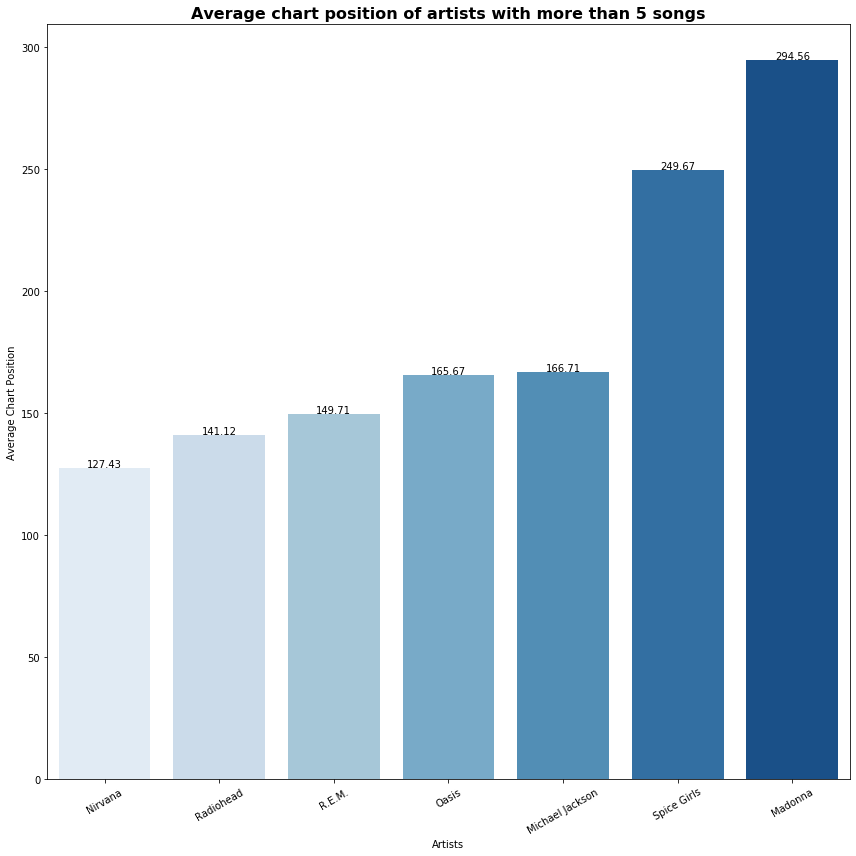

In [15]:
plt.figure(figsize=(12,12))
keys_df = artists_df.loc[artists_df['candidate_songs'] > 5].sort_values('avg_new_chart')
ax = sns.barplot(x=artists_df.loc[artists_df['candidate_songs'] > 5].name, y=artists_df.loc[artists_df['candidate_songs'] > 5].avg_new_chart, 
                 palette = "Blues", order = keys_df.name)
ax.set(xlabel="Artists", ylabel="Average Chart Position")
ax.set_title("Average chart position of artists with more than 5 songs", {'fontsize': 16,'fontweight' : 'bold'})
for item in ax.get_xticklabels(): item.set_rotation(30)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.4,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

Once again, this graph shows the drop in popularity for Madonna. One incentive could be her provocative performance in the Eurovision Song Contest held in Israel in late May 2019, just a few months before these charts were conducted. This performance have left a bad impression to many Israelis who watched it.

## First Letter

In [16]:
first_letters = artists_df.groupby('first_letter')
fl_df = []
for group in first_letters:
    first_letter = {}
    first_letter['name'] = group[0]
    first_letter['count_artists'] = group[1]['name'].count()
    first_letter['sum_candidate_songs'] = group[1]['candidate_songs'].sum()
    first_letter['sum_popularity'] = group[1]['popularity'].sum()
    first_letter['avg_popularity'] = group[1]['popularity'].mean()
    first_letter['sum_views'] = group[1]['sum_views'].sum()
    first_letter['avg_views'] = group[1]['avg_views'].mean()
    first_letter['count_old_chart'] = group[1]['count_old_chart'].sum()
    first_letter['avg_new_chart'] = group[1]['avg_new_chart'].mean()
    first_letter['count_new_chart'] = group[1]['count_new_chart'].sum()
    first_letter['entrance_percentage'] = first_letter['count_new_chart'] / first_letter['sum_candidate_songs']
    fl_df.append(first_letter)
fl_df = pd.DataFrame(fl_df)
print(fl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
name                   29 non-null object
count_artists          29 non-null int64
sum_candidate_songs    29 non-null int64
sum_popularity         29 non-null int64
avg_popularity         29 non-null float64
sum_views              29 non-null int64
avg_views              29 non-null float64
count_old_chart        29 non-null int64
avg_new_chart          29 non-null float64
count_new_chart        29 non-null int64
entrance_percentage    29 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.4+ KB
None


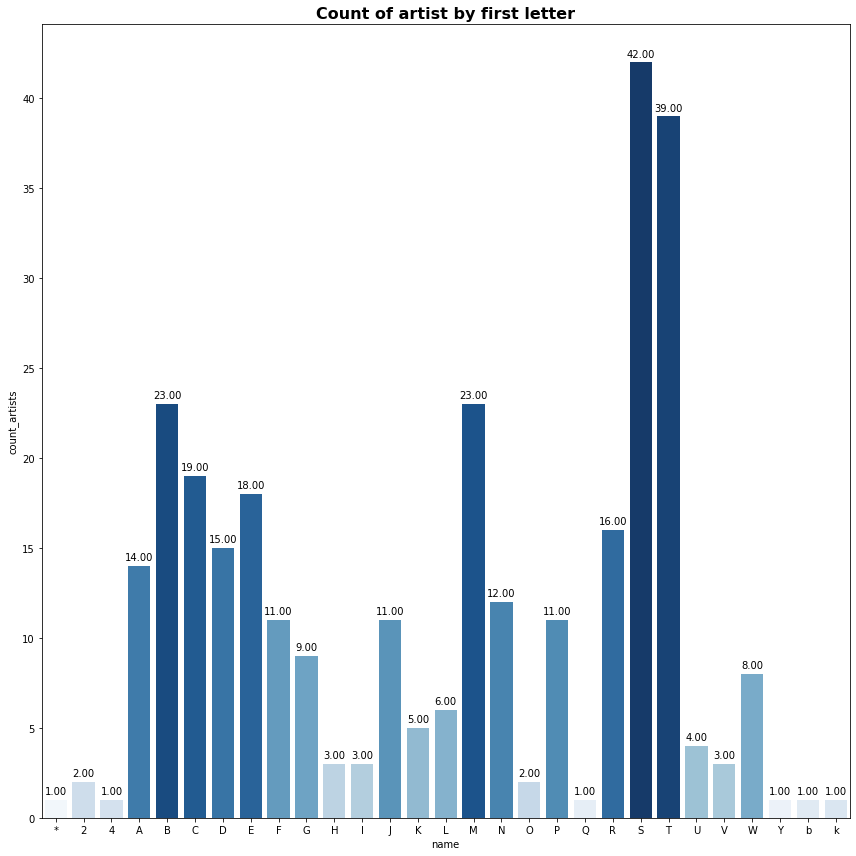

In [17]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_artists.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_artists, order = fl_df.name, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of artist by first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

The most dominant letters by far are 'S' and 'T', the first letters are not as dominant as in previous charts.

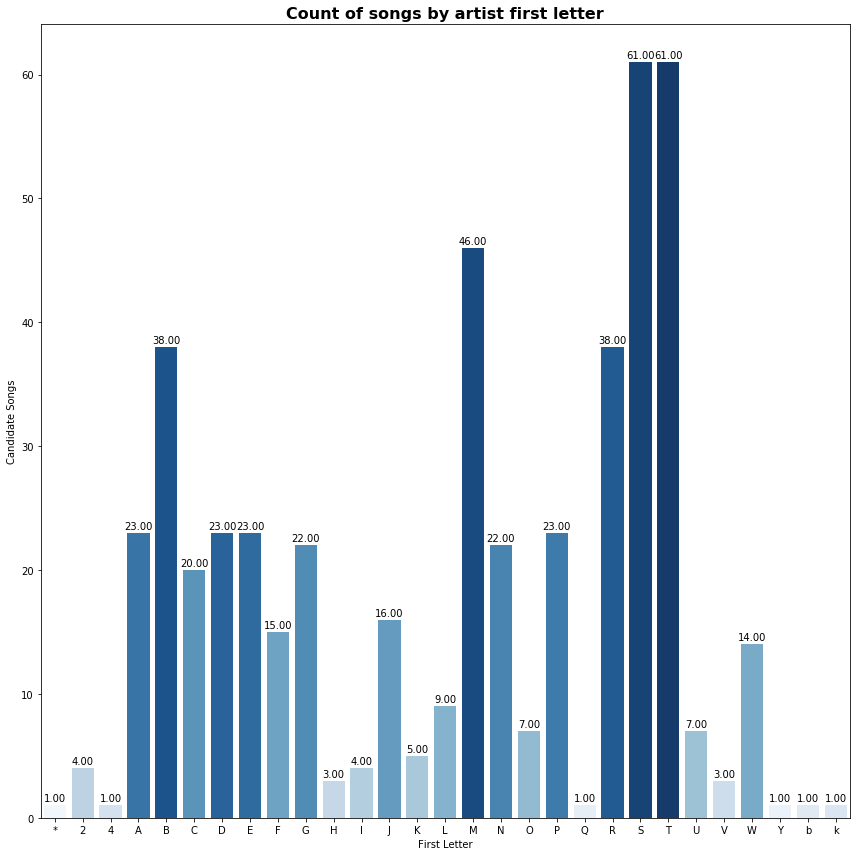

In [18]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_candidate_songs.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_candidate_songs, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Candidate Songs')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

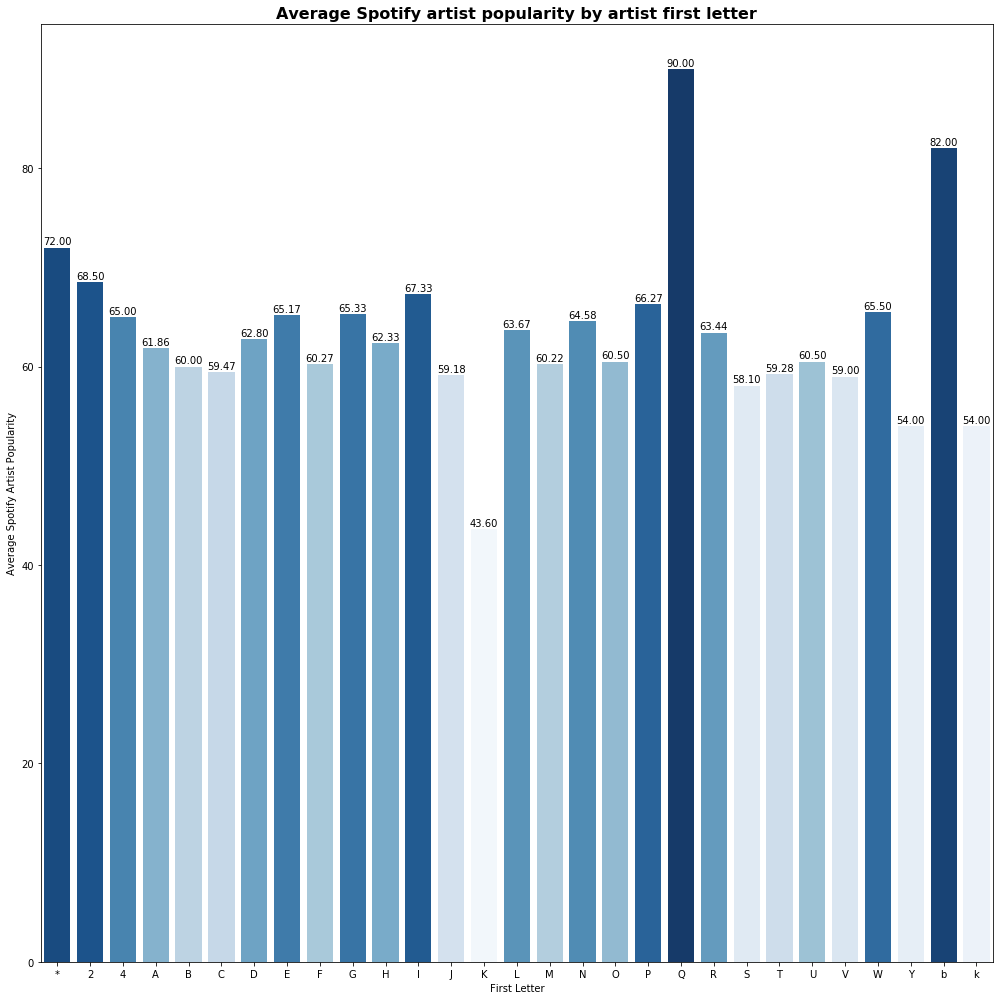

In [19]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.avg_popularity.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.avg_popularity, palette = np.array(pal[::-1])[rank])
ax.set_title("Average Spotify artist popularity by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Average Spotify Artist Popularity')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

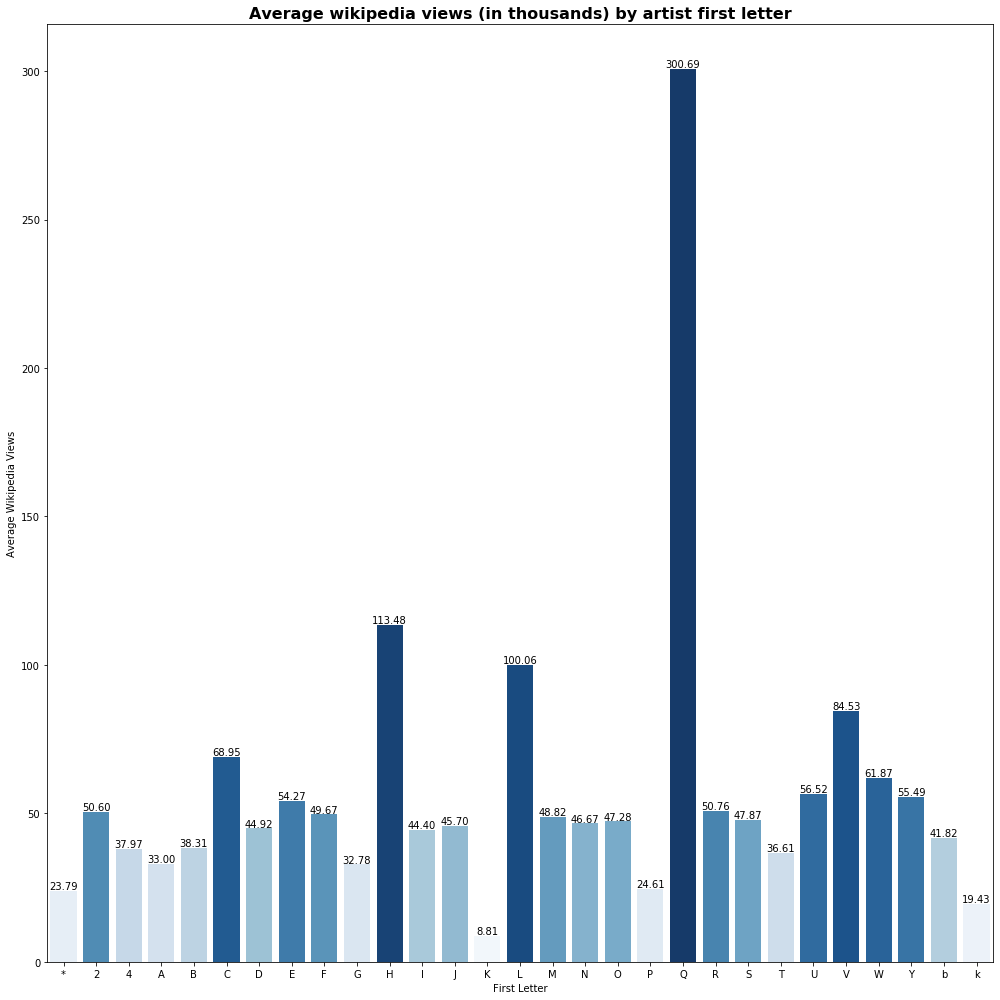

In [20]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.avg_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.avg_views/1000, palette = np.array(pal[::-1])[rank])
ax.set_title("Average wikipedia views (in thousands) by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Average Wikipedia Views')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.5,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

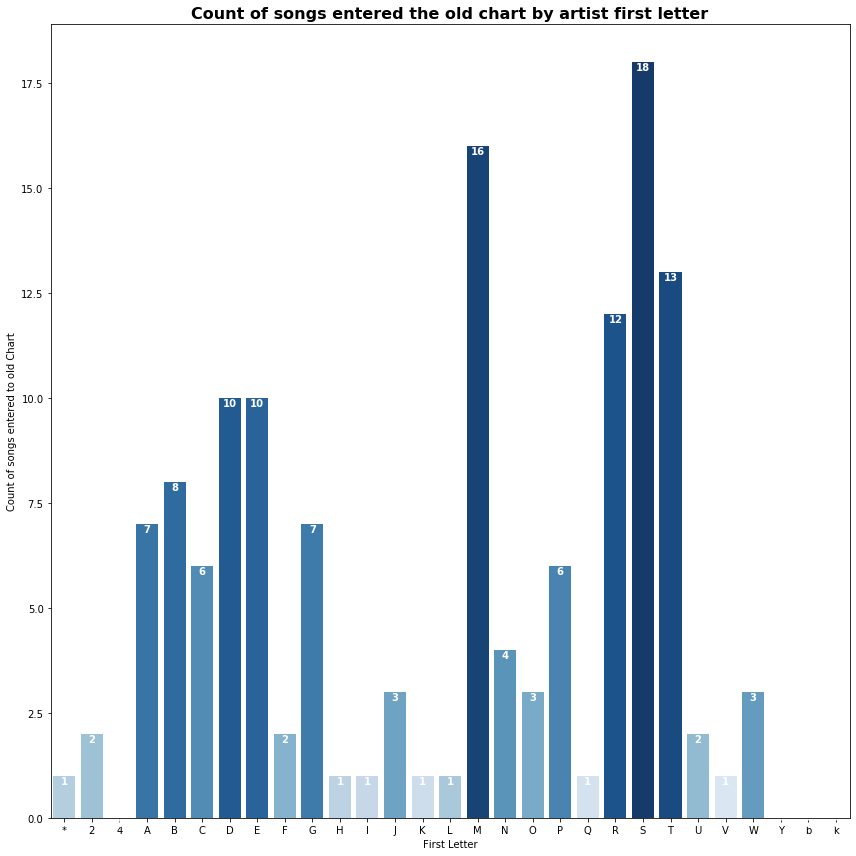

In [21]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_old_chart.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_old_chart, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Count of songs entered to old Chart')
ax.set_title("Count of songs entered the old chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_old_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

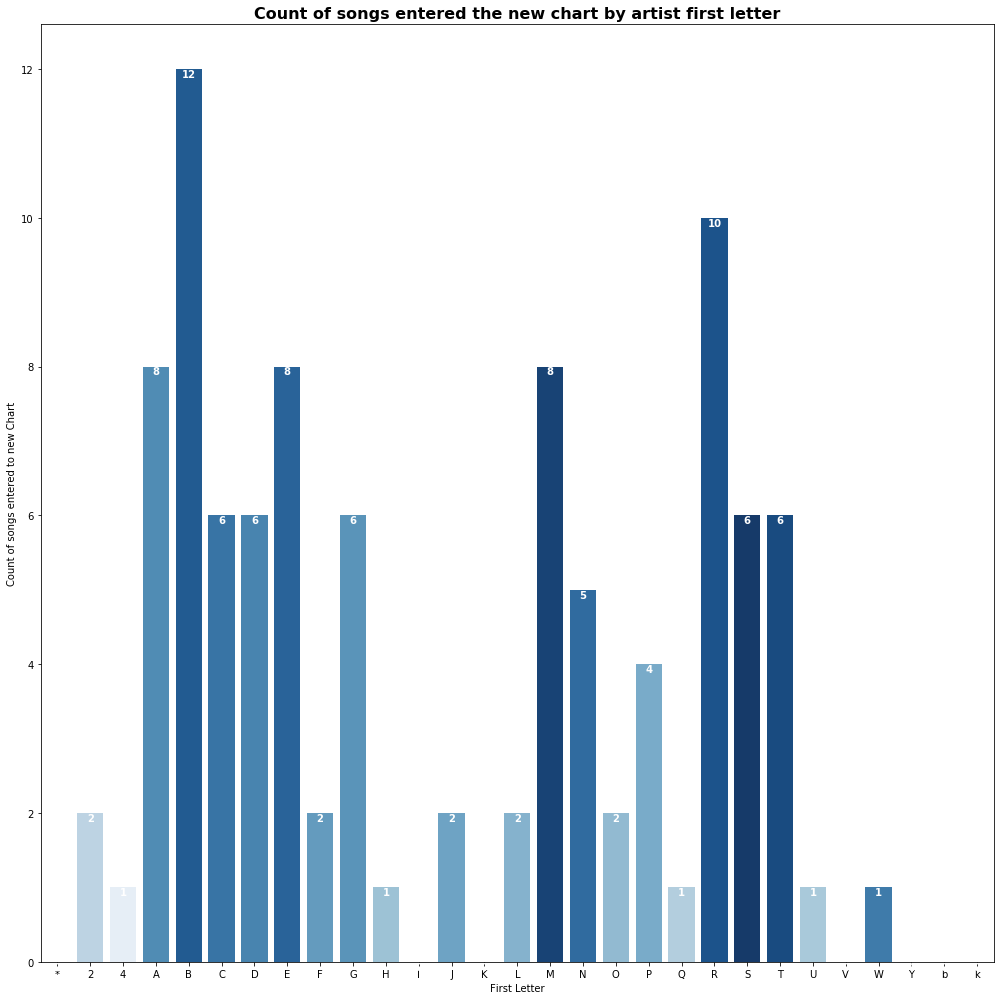

In [22]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_new_chart, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs entered the new chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Count of songs entered to new Chart')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_new_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

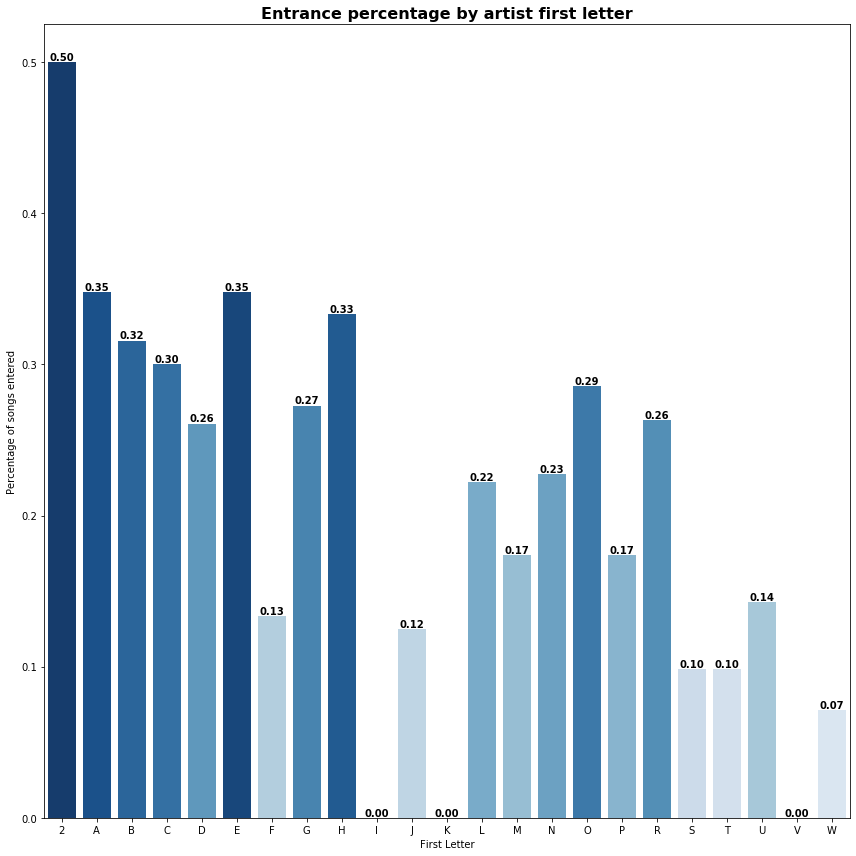

In [23]:
fl_percentage = fl_df.loc[fl_df['sum_candidate_songs'] >= 3]
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_percentage.name))
rank = fl_percentage.entrance_percentage.argsort().argsort()
ax = sns.barplot(x=fl_percentage.name, y=fl_percentage.entrance_percentage, palette = np.array(pal[::-1])[rank])
ax.set_title("Entrance percentage by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Percentage of songs entered')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_percentage.entrance_percentage):
    ax.text(i ,v, "{:,.2f}".format(v), va ='bottom', ha= "center", weight="bold")
plt.tight_layout()
plt.show()

While 'S' and 'T' are dominant in each popularity category out there, they also show dominance when looking at no. of songs entered the old charts. While looking at the number of songs that have entered the new chart, we see a shift. Now the most dominant letter is 'B'. I then examined the entrance percentage. Out of letters with more than three songs, there is no distinct priority to the first letters, though all the letters till 'H' get relatively high values.

## Year

In [4]:
grouped_by_year = nineties_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_candidates'] = group[1]['name'].count()
    year['count_entrances'] = group[1].loc[group[1]['new_chart_location'] <= 100]['name'].count()
    year['entrance_percentage'] = year['count_entrances']/year['count_candidates']
    year['avg_song_pop'] = group[1]['song_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].mean()
    year['avg_valence'] = group[1]['valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_candidates,count_entrances,entrance_percentage,avg_song_pop,avg_views,avg_chart_location,avg_valence,popular_genre
0,1990,30,5,0.166667,54.833333,53631.533333,277.266667,0.596833,Hip hop
1,1991,36,12,0.333333,61.305556,61329.916667,205.111111,0.561389,Alternative rock
2,1992,61,14,0.229508,56.180328,52537.000000,256.377049,0.569426,Alternative rock
3,1993,52,13,0.250000,57.692308,55428.769231,225.615385,0.550750,Alternative rock
4,1994,45,10,0.222222,53.777778,68622.133333,260.755556,0.430602,Alternative rock
5,1995,47,5,0.106383,61.531915,53144.617021,242.468085,0.515128,Alternative rock
6,1996,60,12,0.200000,55.616667,48584.350000,246.600000,0.547100,Alternative rock
7,1997,51,8,0.156863,59.411765,52000.901961,260.254902,0.594376,Alternative rock
8,1998,59,6,0.101695,53.796610,35493.627119,259.000000,0.540661,Alternative rock
9,1999,52,15,0.288462,54.115385,39371.807692,234.961538,0.620963,Pop


This table is pretty similar to the one I produced for the original chart. Here we can see that in almost every year the most popular genre was 'Alternative Rock', though we need to pay attention to the fact that this is an aggergation on the entire nomination list, while the first was an aggergation only on the songs who entered. One again, the most obvious difference between the charts yearwise is the last year of the decade. While the original chart included only three songs from 1999, this chart includes 15(!) songs, which actually make 1999 the most popular year of the decade. One reason might be that in real-time there is not enough perspective to appreciate the last musical year in comparison to the earlier years of the decad, which may get some nostalgic appreciation. When time goes by, the last year of the decade may be precieved as a musical passage to the following decade, which makes it important to those who vote.

Wikipedia entries suggest that people are more interested in the stories behind the earlier songs of the decade. The average valence shows that 1999 is also the year with the happiest music. That could be another reason to it's popularity.

## Year Source

In [5]:
year_source = nineties_df.groupby('year_source')
source_df = []
for group in year_source:
    source = {}
    source['name'] = group[0]
    source['count_songs'] = group[1]['name'].count()
    source['avg_song_popularity'] = group[1]['song_popularity'].mean()
    source['avg_views'] = group[1]['views'].mean()
    source['count_old_chart'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    source['count_new_chart'] = group[1]['new_chart_location'].loc[group[1]['new_chart_location'] <= 100].count()
    source['entrance_percentage'] = source['count_new_chart']/source['count_songs']
    source['avg_new_chart'] = group[1]['new_chart_location'].mean()
    source_df.append(source)
source_df = pd.DataFrame(source_df)
display(source_df)

,name,count_songs,avg_song_popularity,avg_views,count_old_chart,count_new_chart,entrance_percentage,avg_new_chart
0,manual,23,44.739130,37014.913043,8,1,0.043478,304.086957
1,spotify,49,52.897959,67044.102041,9,8,0.163265,263.367347
2,wikipedia,421,57.779097,50027.862233,122,91,0.216152,241.976247


We can see that the songs that were accurately tagged by wikipedia are the most popular ones in Spotify, while those who were tagged by Spotify are the most popular ones in Wikipedia. It may seem strange, but we must remember that there are way more songs tagged by Wikipedia than any other group. That means greater internal variety which may influence the average values.

## Entered Chart

In [6]:
nineties_df["entered_chart"] = nineties_df["new_chart_location"] < 101
entered_chart = nineties_df.groupby('entered_chart')
entered_df = []
for group in entered_chart:
    bol = {}
    bol['name'] = group[0]
    bol['avg_song_popularity'] = group[1]['song_popularity'].mean()
    bol['avg_artist_popularity'] = group[1]['artist_popularity'].mean()
    bol['avg_duration'] = group[1]['duration_ms'].mean()
    bol['avg_key'] = group[1]['key'].mean()
    bol['avg_time_signature'] = group[1]['time_signature'].mean()
    bol['avg_acousticness'] = group[1]['acousticness'].mean()
    bol['avg_danceability'] = group[1]['danceability'].mean()
    bol['avg_energy'] = group[1]['energy'].mean()
    bol['avg_instrumentalness'] = group[1]['instrumentalness'].mean()
    bol['avg_loudness'] = group[1]['loudness'].mean()
    bol['avg_speechiness'] = group[1]['speechiness'].mean()
    bol['avg_valence'] = group[1]['valence'].mean()
    bol['avg_tempo'] = group[1]['tempo'].mean()
    bol['avg_views'] = group[1]['views'].mean()
    bol['avg_year'] = group[1]['year'].mean()
    bol['count_old_position'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    entered_df.append(bol)
entered_df = pd.DataFrame(entered_df)
display(entered_df)

,name,avg_song_popularity,avg_artist_popularity,avg_duration,avg_key,avg_time_signature,avg_acousticness,avg_danceability,avg_energy,avg_instrumentalness,avg_loudness,avg_speechiness,avg_valence,avg_tempo,avg_views,avg_year,count_old_position
0,False,53.732824,63.585242,260298.834606,5.631043,3.969466,0.147431,0.613066,0.701238,0.087928,-8.118234,0.064832,0.567105,117.02028,35436.157761,1994.913486,83
1,True,68.290000,74.270000,275221.000000,5.420000,3.890000,0.181825,0.555990,0.669350,0.007986,-7.639630,0.051129,0.495330,114.88242,112718.240000,1994.550000,56


Comparing the songs who entered the chart to those who didn't shows significant differences in all the popularity indicators. The songs who entered the chart are more popular in Spotify, the come from more popular artists, they are less danceable, and they are way more popular in wikipedia views.

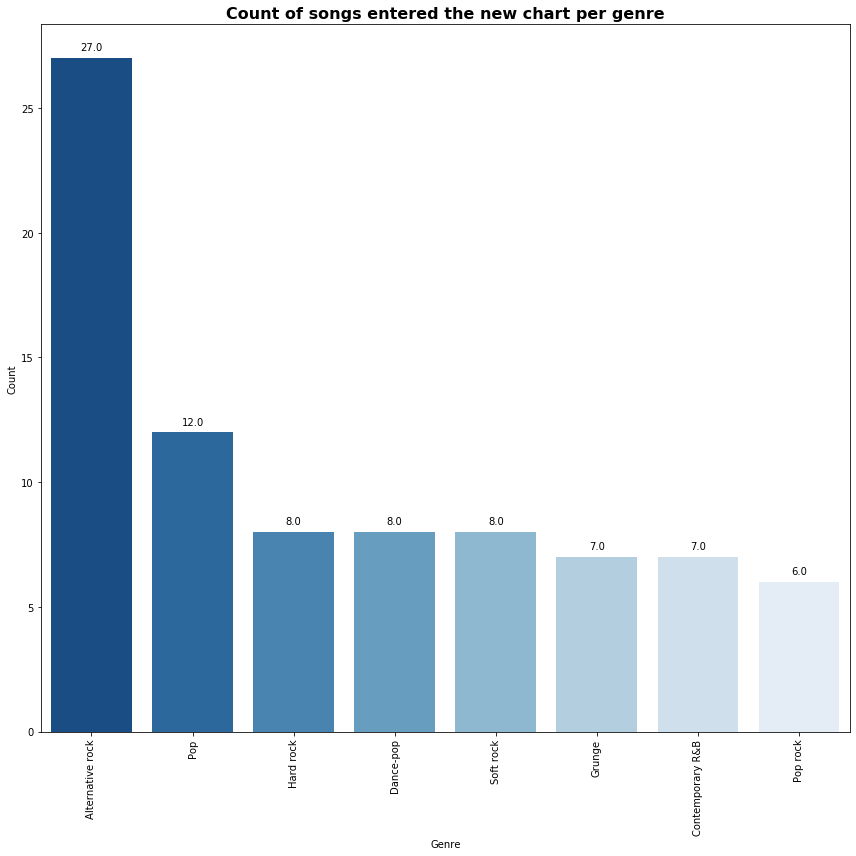

In [7]:
entered_songs = nineties_df.loc[nineties_df['entered_chart'] == True]
genres_dict = {}
for song_genre in entered_songs['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the new chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

Once again, the most popular genre in the 90's is alternative rock. Now it is even by a larger margin than in the original chart.

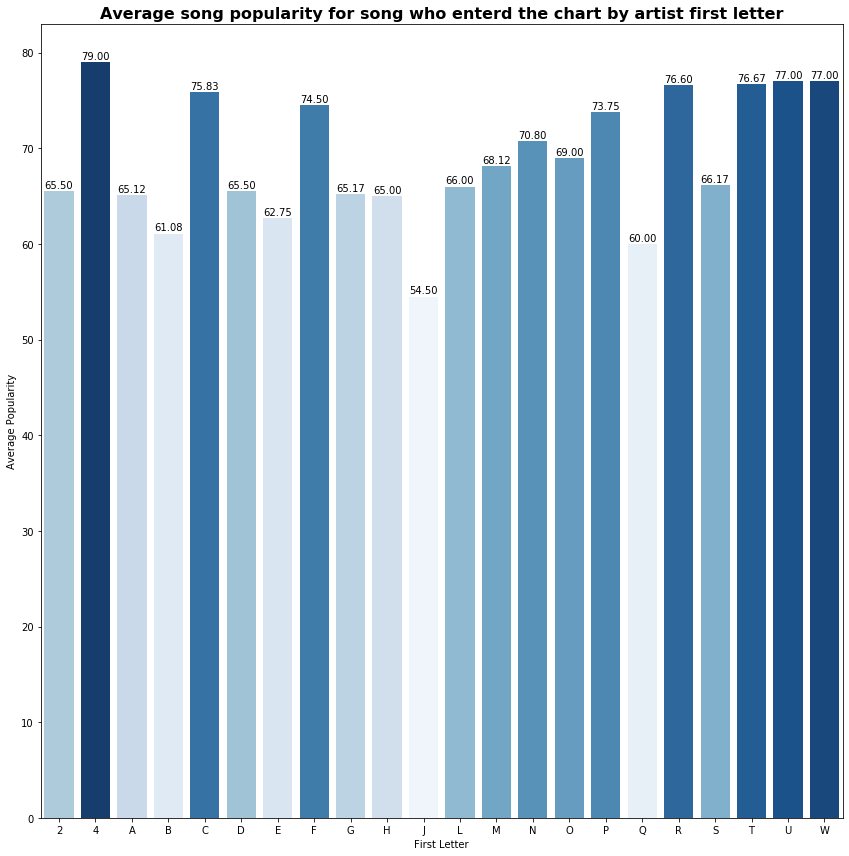

In [8]:
entered_first_letter = entered_songs.groupby('artist_first_letter')
entered_fl_df = []
for group in entered_first_letter:
    entered_fl = {}
    entered_fl['name'] = group[0]
    entered_fl['avg_song_popularity'] = group[1]['song_popularity'].mean()
    entered_fl['avg_chart_location'] = group[1]['new_chart_location'].mean()
    entered_fl_df.append(entered_fl)
entered_fl_df = pd.DataFrame(entered_fl_df)
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(entered_fl_df.name))
rank = entered_fl_df.avg_song_popularity.argsort().argsort()
ax = sns.barplot(x=entered_fl_df.name, y=entered_fl_df.avg_song_popularity, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Average Popularity')
ax.set_title("Average song popularity for song who enterd the chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [9]:
count_first_songs = 0
popularity_first_rate = 0
location_first_rate = 0
count_last_songs = 0
popularity_last_rate = 0
location_last_rate = 0
for fl in entered_first_letter:
    if fl[0] in ['1', 'A', 'B']:
        count_first_songs = count_first_songs + fl[1]['name'].count()
        popularity_first_rate = popularity_first_rate + fl[1]['song_popularity'].sum()
        location_first_rate = location_first_rate + fl[1]['new_chart_location'].sum()
    else:
        count_last_songs = count_last_songs + fl[1]['name'].count()
        popularity_last_rate = popularity_last_rate + fl[1]['song_popularity'].sum()
        location_last_rate = location_last_rate + fl[1]['new_chart_location'].sum()
comparing_letters = pd.DataFrame({'Name': ['First Letters', 'Rest of the Letters'], 'Count': [count_first_songs, count_last_songs], 'Popularity': [popularity_first_rate, popularity_last_rate],
                                 'Avg_Popularity': [popularity_first_rate/count_first_songs, popularity_last_rate/count_last_songs],
                                 'Avg_Location': [location_first_rate/count_first_songs, location_last_rate/count_last_songs]})
display(comparing_letters)

,Name,Count,Popularity,Avg_Popularity,Avg_Location
0,First Letters,20,1254,62.7000,38.4500
1,Rest of the Letters,80,5575,69.6875,53.5125


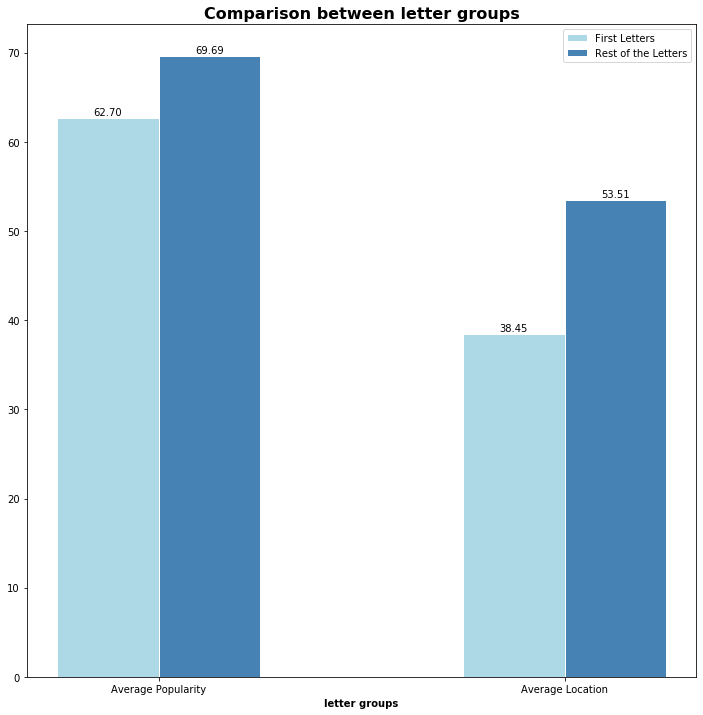

In [10]:
df_for_graph = pd.DataFrame({
    'First Letters': [popularity_first_rate/count_first_songs, location_first_rate/count_first_songs],
    'Rest': [popularity_last_rate/count_last_songs, location_last_rate/count_last_songs]
})

barWidth = 0.25
 
# set height of bar
bars1 = df_for_graph['First Letters']
bars2 = df_for_graph['Rest']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Comparison between letter groups", {'fontsize': 16,'fontweight' : 'bold'})

# Make the plot
plt.bar(r1, bars1, color='lightblue', width=barWidth, edgecolor='white', label='First Letters')
plt.bar(r2, bars2, color='steelblue', width=barWidth, edgecolor='white', label='Rest of the Letters')

# Add xticks on the middle of the group bars
plt.xlabel('letter groups', fontweight='bold')
plt.xticks([r + (barWidth / 2) for r in range(len(bars1))], ['Average Popularity', 'Average Location'])

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")

# Create legend & Show graphic
plt.legend()
plt.show()


Once again I have aggregated the first letters against the other letters. The bias is shown - songs coming from artists with the first letters are less popular and reach higher places than other songs.

## Trend Analysis

In [23]:
drop = []
for new_song in nineties_df.iterrows():
    if new_song[1]['original_decade_position'] > 0:
        drop.append(new_song[1]['new_chart_location'] - new_song[1]['original_decade_position'])
    else:
        drop.append(-1000)
nineties_df['position_drop'] = drop
display(nineties_df.sort_values(by=['position_drop'], ascending=False).head(1))

,name,version_exists,artist,artist_first_letter,year,year_source,song_popularity,artist_popularity,duration_ms,key,...,loudness,speechiness,valence,tempo,genres,views,old_chart_position,new_chart_location,original_decade_position,position_drop
404,nineties_A Design for Life,1,Manic Street Preachers,M,1996,wikipedia,57,59,257640,0,...,-4.723,0.0468,0.348,88.225,"['Britpop', 'Orchestral pop']",14464,0,405,43,362


The highest drop was 'A Design For Life' by Manic Street Preachers. It was dropped by a stunning 362(!) places from the 43th place to the 405th place. It was also the second least danceable song in the entire nomination list, which left me wondering if there is such an interaction:

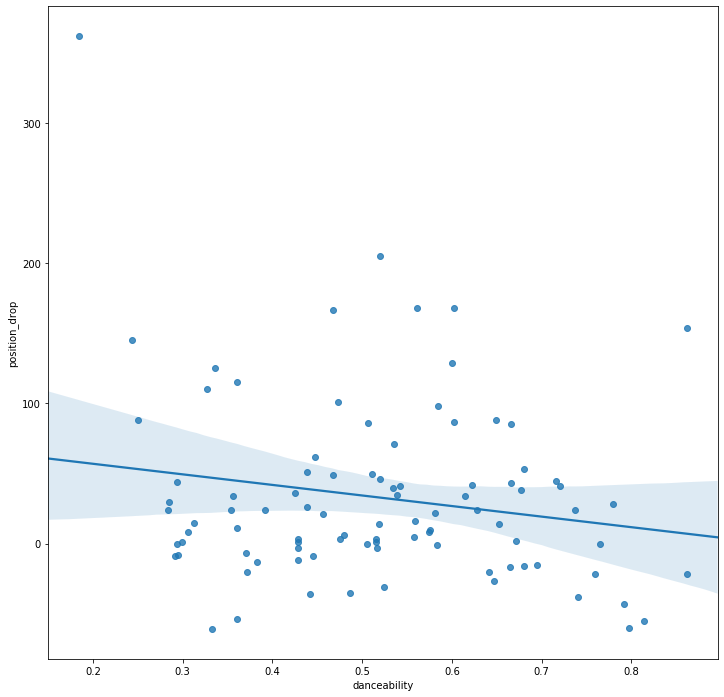

In [26]:
plt.figure(figsize=(12,12))
sns.regplot(x="danceability", y="position_drop", data=nineties_df.loc[nineties_df['position_drop'] > -1000])

Looking at the chart, it seems like the song is more of an outlier then an indicator. None the less, I wanted to find out which song have made the highest rise:

In [29]:
display(nineties_df.loc[nineties_df['position_drop'] > -1000].sort_values(by=['position_drop']).head(1))

,name,version_exists,artist,artist_first_letter,year,year_source,song_popularity,artist_popularity,duration_ms,key,...,speechiness,valence,tempo,genres,views,old_chart_position,new_chart_location,original_decade_position,position_drop,trend
34,nineties_Don't Look Back In Anger,1,Oasis,O,1996,wikipedia,65,80,289559,0,...,0.0592,0.335,162.978,['Britpop'],113544,17,35,96,-61,up


In [30]:
def set_trend(x):
    if x > 0:
        return "down"
    if x == 0:
        return "no change"
    if x < 0 and x > -1000:
        return "up"
    else:
        return "new"

nineties_df["trend"] = nineties_df["position_drop"].apply(set_trend)
nineties_trend = nineties_df.groupby('trend')
trend_df = []
for group in nineties_trend:
    bol = {}
    bol['name'] = group[0]
    bol['count'] = group[1]['name'].count()
    bol['avg_song_popularity'] = group[1]['song_popularity'].mean()
    bol['avg_artist_popularity'] = group[1]['artist_popularity'].mean()
    bol['avg_acousticness'] = group[1]['acousticness'].mean()
    bol['avg_danceability'] = group[1]['danceability'].mean()
    bol['avg_energy'] = group[1]['energy'].mean()
    bol['avg_valence'] = group[1]['valence'].mean()
    bol['avg_tempo'] = group[1]['tempo'].mean()
    bol['avg_views'] = group[1]['views'].mean()
    trend_df.append(bol)
trend_df = pd.DataFrame(trend_df)
display(trend_df)

,name,count,avg_song_popularity,avg_artist_popularity,avg_acousticness,avg_danceability,avg_energy,avg_valence,avg_tempo,avg_views
0,down,64,64.546875,71.984375,0.235439,0.504125,0.626297,0.393484,116.852281,88411.843750
1,new,400,54.775000,63.995000,0.141228,0.620890,0.706111,0.582728,116.980320,39588.305000
2,no change,3,76.333333,77.000000,0.014794,0.521333,0.585333,0.424333,97.385000,210178.333333
3,up,26,64.461538,76.153846,0.173814,0.551923,0.701462,0.494546,112.091654,118231.500000


I have grouped the new chart into these groups, and I found out that the songs who went up the chart are coming from more popular artists, they are happier and more energetic, and they have significantly more Wikipedia Views than those who dropped.